In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('us_congestion_2016_2022_sample_2m.csv')

In [ ]:
data.head(10)

,ID,Severity,Start_Lat,Start_Lng,StartTime,EndTime,Distance(mi),DelayFromTypicalTraffic(mins),DelayFromFreeFlowSpeed(mins),Congestion_Speed,...,Temperature(F),WindChill(F),Humidity(%),Pressure(in),Visibility(mi),WindDir,WindSpeed(mph),Precipitation(in),Weather_Event,Weather_Conditions
0,C-14344128,2,39.191032,-120.819740,2016-12-20T19:19:00.000-05:00,2016-12-20T19:33:47.000-05:00,1.40,2.58,2.60,Moderate,...,54.0,NaN,30.0,30.15,10.00,North,3.5,NaN,NaN,Clear
1,C-32285069,0,41.736015,-87.721565,2018-11-16T17:18:00.000-05:00,2018-11-16T18:08:28.000-05:00,0.73,0.42,1.00,Slow,...,39.0,31.8,70.0,30.06,10.00,West,11.5,NaN,NaN,Overcast
2,C-14213642,0,32.519043,-93.741096,2021-02-18T20:32:00.000-05:00,2021-02-18T21:21:32.000-05:00,1.80,1.00,2.00,Moderate,...,30.0,30.0,79.0,30.20,10.00,WNW,3.0,0.00,NaN,Fair
3,C-29674072,0,40.730564,-74.001709,2020-11-13T08:06:00.000-05:00,2020-11-13T08:48:22.000-05:00,1.42,1.00,2.00,Slow,...,48.0,48.0,93.0,29.92,1.00,VAR,3.0,0.04,NaN,Light Rain
4,C-24044478,1,33.758331,-118.238533,2017-08-24T09:54:00.000-04:00,2017-08-24T11:13:19.000-04:00,2.60,4.90,6.92,Slow,...,66.9,NaN,79.0,29.89,9.00,Calm,NaN,NaN,NaN,Overcast
5,C-18495502,1,42.665081,-85.661926,2022-02-17T19:50:00.000-05:00,2022-02-17T20:32:38.000-05:00,6.88,3.00,3.00,Fast,...,21.0,8.0,92.0,28.88,0.75,NNE,15.0,0.04,NaN,Light Snow
6,C-18160069,2,40.766750,-73.950722,2020-11-03T11:22:00.000-05:00,2020-11-03T12:18:18.000-05:00,2.39,2.00,5.00,Slow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C-10015929,1,40.705330,-74.089493,2021-01-19T14:42:00.000-05:00,2021-01-19T15:28:02.000-05:00,4.93,3.00,5.00,Moderate,...,40.0,32.0,49.0,29.93,10.00,SW,14.0,0.00,NaN,Mostly Cloudy
8,C-25077961,1,33.467129,-112.169113,2019-02-19T18:20:00.000-05:00,2019-02-19T19:05:04.000-05:00,1.15,0.83,1.60,Slow,...,57.2,NaN,23.0,30.00,10.00,SSW,17.3,NaN,NaN,Scattered Clouds
9,C-24172821,2,34.163628,-118.295052,2017-09-01T23:49:00.000-04:00,2017-09-02T00:29:49.000-04:00,3.76,3.60,3.65,Fast,...,93.9,NaN,26.0,29.73,10.00,WSW,5.8,NaN,NaN,Partly Cloudy


In [ ]:
data.columns

Index(['ID', 'Severity', 'Start_Lat', 'Start_Lng', 'StartTime', 'EndTime',
       'Distance(mi)', 'DelayFromTypicalTraffic(mins)',
       'DelayFromFreeFlowSpeed(mins)', 'Congestion_Speed', 'Description',
       'Street', 'City', 'County', 'State', 'Country', 'ZipCode',
       'LocalTimeZone', 'WeatherStation_AirportCode', 'WeatherTimeStamp',
       'Temperature(F)', 'WindChill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'WindDir', 'WindSpeed(mph)', 'Precipitation(in)',
       'Weather_Event', 'Weather_Conditions'],
      dtype='object')

In [ ]:
data['StartTime'] = pd.to_datetime(data['StartTime'], errors='coerce')
data['EndTime'] = pd.to_datetime(data['EndTime'], errors='coerce')
data['Hour'] = data['StartTime'].dt.hour
data['DayOfWeek'] = data['StartTime'].dt.day_name()
data['Month'] = data['StartTime'].dt.month

In [ ]:
data['Duration(mins)'] = (data['EndTime'] - data['StartTime']).dt.total_seconds() / 60

In [ ]:
hourly_data = data.groupby('Hour')['DelayFromTypicalTraffic(mins)'].mean().reset_index()

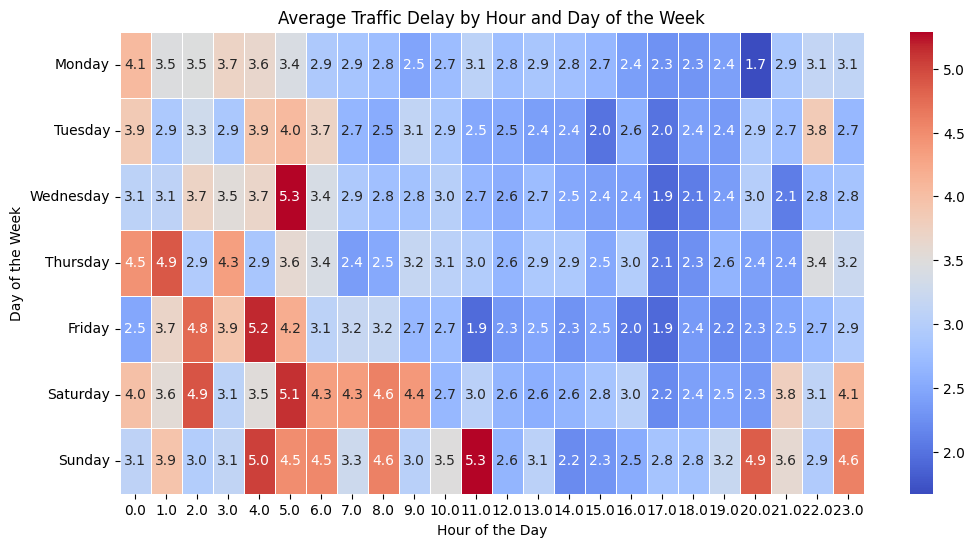

In [ ]:
# Aggregate delay data
heatmap_data = data.groupby(['DayOfWeek', 'Hour'])['DelayFromTypicalTraffic(mins)'].mean().unstack()

# Reorder days for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(index=days_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Average Traffic Delay by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

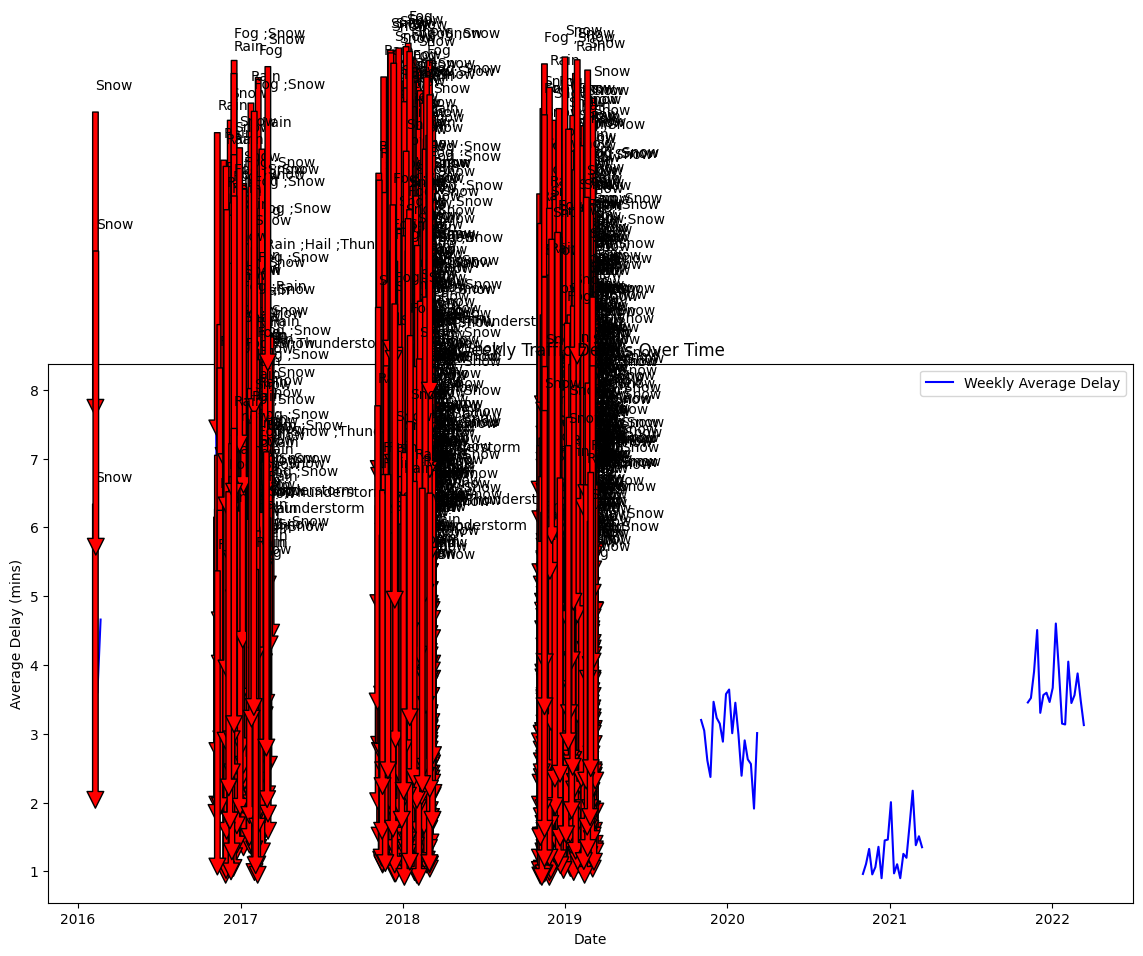

In [ ]:
# Resample delay data to weekly averages
weekly_data = data.resample('W', on='StartTime')['DelayFromTypicalTraffic(mins)'].mean()

# Plot time series
plt.figure(figsize=(14, 7))
plt.plot(weekly_data.index, weekly_data, label='Weekly Average Delay', color='blue')
plt.title('Weekly Traffic Delays Over Time')
plt.xlabel('Date')
plt.ylabel('Average Delay (mins)')
plt.legend()

# Add annotations for significant weather events
significant_events = data[data['Weather_Event'].notnull()]
for _, event in significant_events.iterrows():
    plt.annotate(event['Weather_Event'],
                 xy=(event['StartTime'], event['DelayFromTypicalTraffic(mins)']),
                 xytext=(event['StartTime'], event['DelayFromTypicalTraffic(mins)'] + 5),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

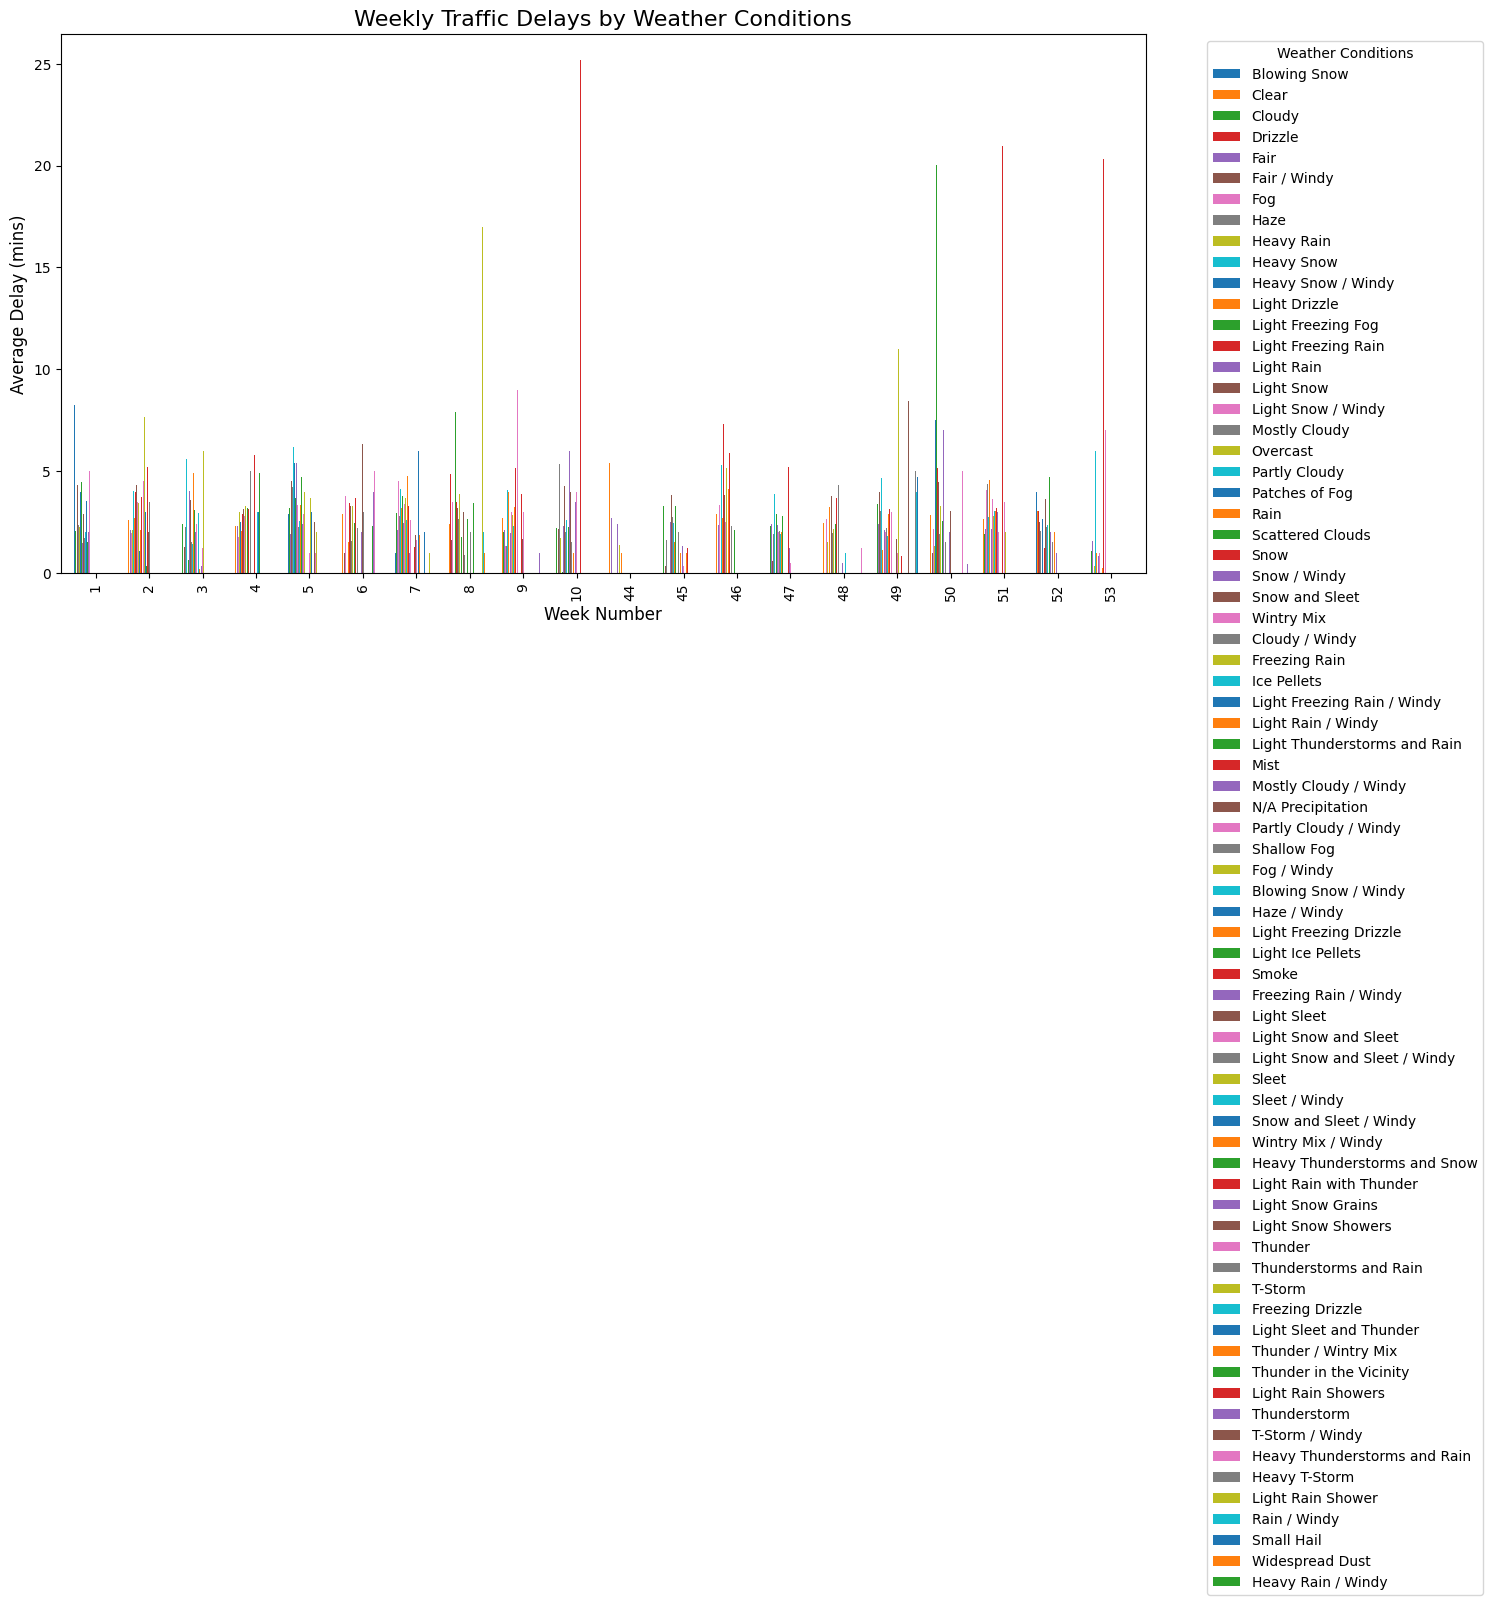

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the week number and weather conditions
data['Week'] = data['StartTime'].dt.isocalendar().week
weekly_weather_data = data.groupby(['Week', 'Weather_Conditions'])['DelayFromTypicalTraffic(mins)'].mean().unstack()

# Plot grouped bar chart
weekly_weather_data.plot(kind='bar', figsize=(14, 7), width=0.8)

# Add titles and labels
plt.title('Weekly Traffic Delays by Weather Conditions', fontsize=16)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Average Delay (mins)', fontsize=12)
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Heatmap

In [ ]:
import folium
import pandas as pd
from folium.plugins import HeatMap

# Load data
data = pd.read_csv("us_congestion_2016_2022_sample_2m.csv")

# Filter relevant columns
heatmap_data = data[['Start_Lat', 'Start_Lng', 'DelayFromTypicalTraffic(mins)']].dropna()

# Create base map centered around the city
m = folium.Map(location=[heatmap_data['Start_Lat'].mean(), heatmap_data['Start_Lng'].mean()], zoom_start=12)

# Add heatmap layer
HeatMap(heatmap_data.values, radius=10, max_zoom=13).add_to(m)

# Save and display
m.save("traffic_heatmap.html")

In [ ]:
!pip install geopandas contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 86.8 MB/s eta 0:00:00


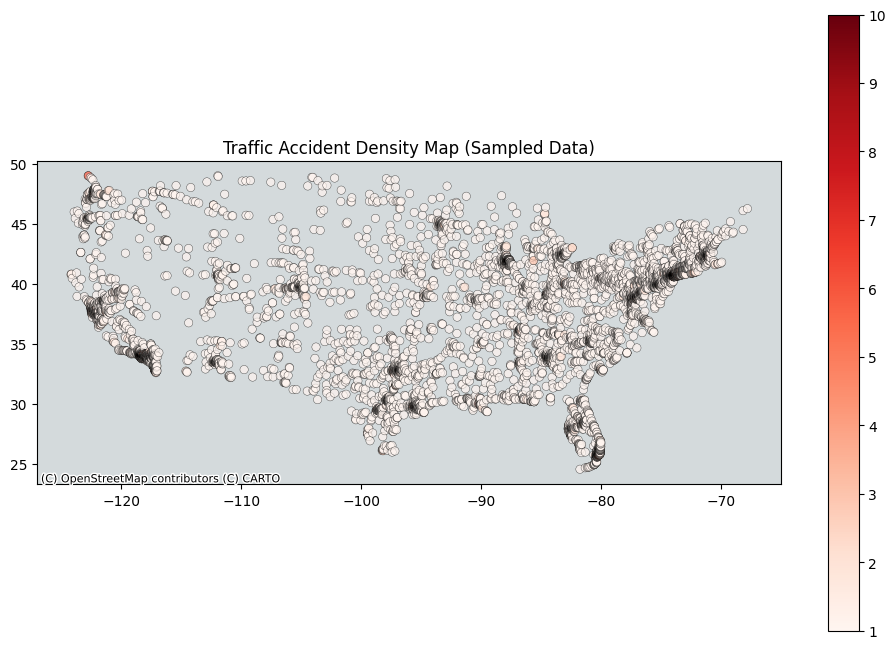

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from shapely.geometry import Point

# Load data
df = pd.read_csv("us_congestion_2016_2022_sample_2m.csv")

# Sample 10,000 points (or the full dataset if smaller)
sample_size = min(10000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)  # Random state for reproducibility

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_sample, geometry=gpd.points_from_xy(df_sample.Start_Lng, df_sample.Start_Lat))

# Define hexbin size (adjust based on city size)
hexbin_size = 0.01  # Approx. 1km

# Create hexbins by rounding coordinates
gdf["hex_x"] = (gdf.geometry.x / hexbin_size).round()
gdf["hex_y"] = (gdf.geometry.y / hexbin_size).round()

# Count incidents per hexbin
hex_counts = gdf.groupby(["hex_x", "hex_y"]).size().reset_index(name="count")

# Convert hexbin centers back to Points
hex_counts["geometry"] = hex_counts.apply(lambda row: Point(row.hex_x * hexbin_size, row.hex_y * hexbin_size), axis=1)
hex_gdf = gpd.GeoDataFrame(hex_counts, geometry="geometry")

# Plot hexbin map
fig, ax = plt.subplots(figsize=(12, 8))
hex_gdf.plot(column="count", cmap="Reds", edgecolor="k", linewidth=0.3, alpha=0.7, ax=ax, legend=True)

# Add a basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)
plt.title("Traffic Accident Density Map (Sampled Data)")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


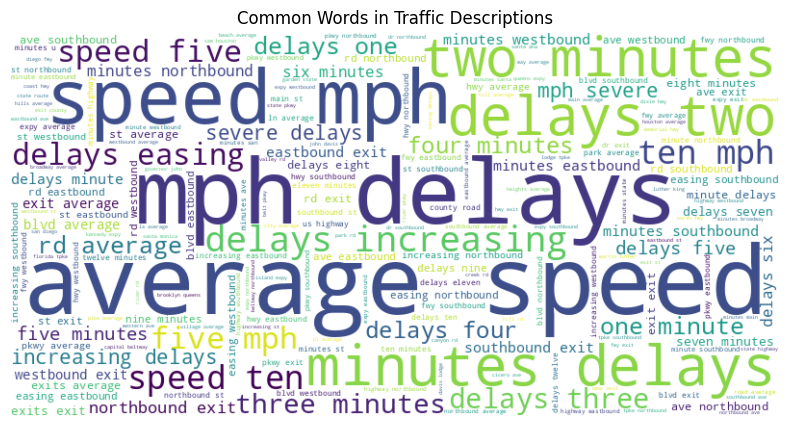

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("us_congestion_2016_2022_sample_2m.csv")

# Fill missing descriptions
df["Description"] = df["Description"].fillna("")

# Download 'punkt_tab' data for sentence tokenization
nltk.download("stopwords")
nltk.download("punkt_tab") # Download the missing 'punkt_tab' data
nltk.download("punkt")
stop_words = set(stopwords.words("english"))

df["Clean_Description"] = df["Description"].apply(lambda x: " ".join(
    [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words]
))

# Generate WordCloud for common complaint words
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["Clean_Description"]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Traffic Descriptions")
plt.show()

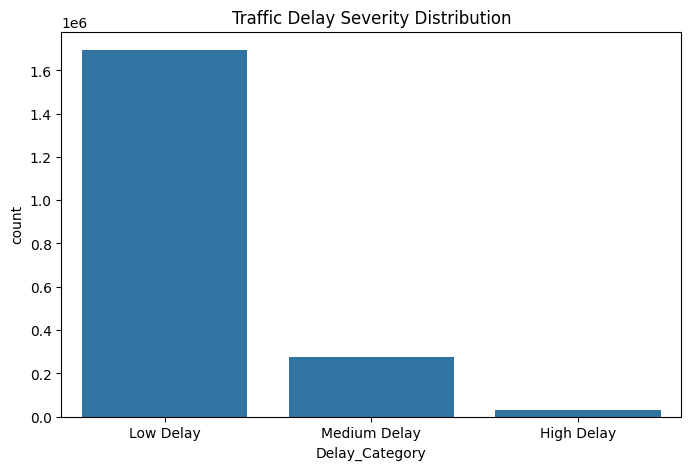

In [ ]:
# Define delay categories
def classify_delay(minutes):
    if minutes <= 5:
        return "Low Delay"
    elif minutes <= 15:
        return "Medium Delay"
    else:
        return "High Delay"

df["Delay_Category"] = df["DelayFromTypicalTraffic(mins)"].apply(classify_delay)

# Count plot for delay severity
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Delay_Category", order=["Low Delay", "Medium Delay", "High Delay"])
plt.title("Traffic Delay Severity Distribution")
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


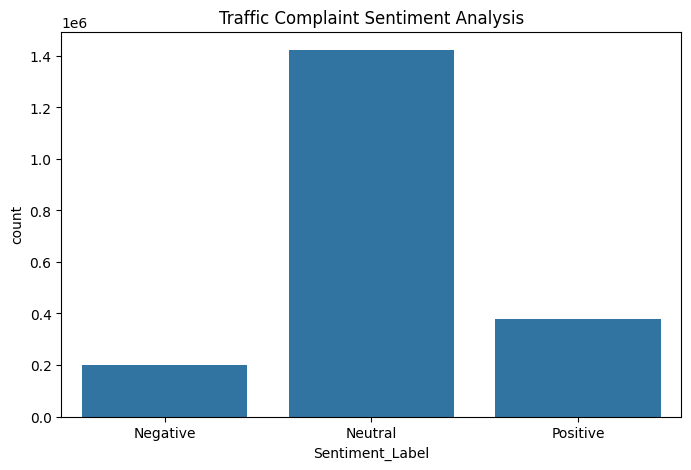

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df["Sentiment"] = df["Clean_Description"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Categorize into Positive, Neutral, Negative
df["Sentiment_Label"] = df["Sentiment"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral"))

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Sentiment_Label", order=["Negative", "Neutral", "Positive"])
plt.title("Traffic Complaint Sentiment Analysis")
plt.show()

/usr/local/lib/python3.11/dist-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


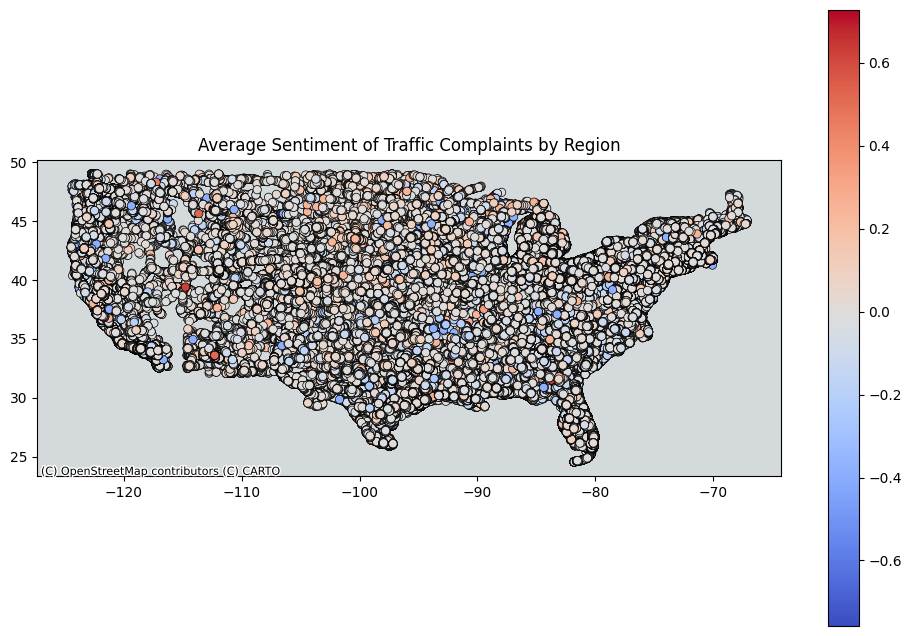

In [ ]:
import geopandas as gpd
import contextily as ctx

# Group by city and calculate average sentiment
city_sentiment = df.groupby("City")["Sentiment"].mean().reset_index()

# Merge city_sentiment with df to get lat/lon for each city
city_sentiment = pd.merge(city_sentiment, df[['City', 'Start_Lng', 'Start_Lat']].drop_duplicates(), on='City', how='left')

# Convert city names to geolocations using the merged lat/lon
city_sentiment["geometry"] = gpd.points_from_xy(city_sentiment["Start_Lng"], city_sentiment["Start_Lat"])
gdf = gpd.GeoDataFrame(city_sentiment, geometry="geometry")

# Plot sentiment map
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column="Sentiment", cmap="coolwarm", edgecolor="black", linewidth=0.5, ax=ax, legend=True)
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)
plt.title("Average Sentiment of Traffic Complaints by Region")
plt.show()

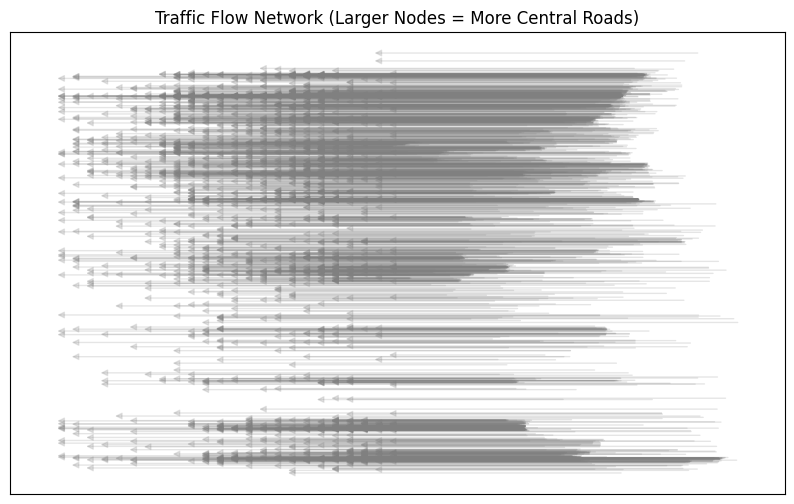

In [ ]:
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("us_congestion_2016_2022_sample_2m.csv")

# Sampling
sample_size = 10000  # Adjust as needed
df_sample = df.sample(n=sample_size, random_state=42)

# Create Graph
G = nx.DiGraph()

# Add edges (Road Segments) - optimized
for _, row in df_sample.iterrows():
    start = (row["Start_Lat"], row["Start_Lng"])
    # Changed: Convert "EndTime" to a numeric representation
    # For example, extract the hour:
    end_time_numeric = pd.to_datetime(row["EndTime"]).hour
    end = (end_time_numeric, row["Start_Lng"])

    # Alternatively, use total seconds since epoch:
    # end_time_numeric = pd.to_datetime(row["EndTime"]).timestamp()
    # end = (end_time_numeric, row["Start_Lng"])

    delay = row["DelayFromFreeFlowSpeed(mins)"]
    if delay > 5:  # Filter out low-delay edges
        G.add_edge(start, end, weight=delay)

# Compute centrality - optimized
centrality = nx.betweenness_centrality(G, weight="weight", k=100)  # Use k for approximation

# Plot Graph - optimized
plt.figure(figsize=(10, 6))
pos = {node: node for node in G.nodes()}
node_sizes = [v * 5000 for v in centrality.values()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="red", alpha=0.5)
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.2)  # Simplified edge drawing
plt.title("Traffic Flow Network (Larger Nodes = More Central Roads)")
plt.show()

In [ ]:
!pip install contextily

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Aggregate congestion flow between roads
traffic_flow = df.groupby(["Street", "City"])["DelayFromFreeFlowSpeed(mins)"].sum().reset_index()
traffic_flow = traffic_flow.sort_values(by="DelayFromFreeFlowSpeed(mins)", ascending=False).head(20)  # Top congested flows

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(set(traffic_flow["Street"].tolist() + traffic_flow["City"].tolist())),  # Unique streets and cities
    ),
    link=dict(
        source=[list(set(traffic_flow["Street"].tolist() + traffic_flow["City"].tolist())).index(src) for src in traffic_flow["Street"]],
        target=[list(set(traffic_flow["Street"].tolist() + traffic_flow["City"].tolist())).index(tgt) for tgt in traffic_flow["City"]],
        value=traffic_flow["DelayFromFreeFlowSpeed(mins)"]
    )
))

fig.update_layout(title_text="Traffic Congestion Flow Between Roads and Cities", font_size=10)
fig.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

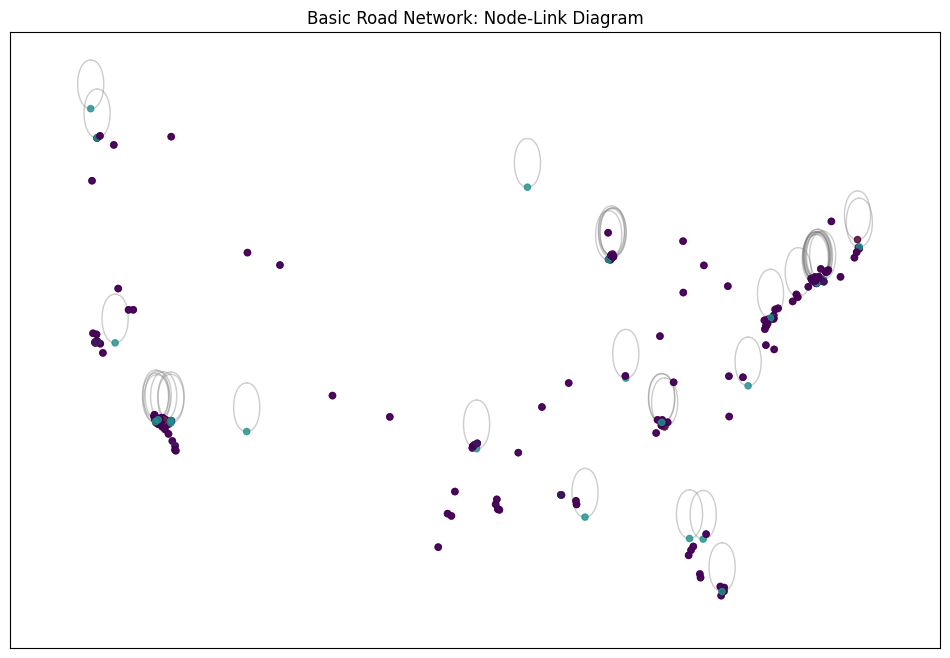

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import great_circle

# Load and preprocess data
df = pd.read_csv("us_congestion_2016_2022_sample_2m.csv")
df_sample = df.sample(n=5000).dropna(subset=["Start_Lat", "Start_Lng", "Street"])

# Create nodes (intersections) by rounding coordinates
precision = 3  # ~100m grouping
df_sample["Node"] = list(zip(
    df_sample["Start_Lat"].round(precision),
    df_sample["Start_Lng"].round(precision)
))

# Build graph
G = nx.Graph()

# Add edges (roads) between nearby intersections on the same street
for (street, city, state), group in df_sample.groupby(["Street", "City", "State"]):
    group = group.sort_values("StartTime")
    prev_node = None
    for _, row in group.iterrows():
        current_node = row["Node"]
        if prev_node and great_circle(prev_node, current_node).km < 1:  # Connect if < 1km apart
            G.add_edge(prev_node, current_node)
        prev_node = current_node

# Compute degree centrality (optional for coloring nodes)
degree_centrality = nx.degree_centrality(G)

# Visualization
plt.figure(figsize=(12, 8))
pos = {node: (node[1], node[0]) for node in G.nodes()}  # (lng, lat) for plotting

# Draw nodes colored by degree centrality
nx.draw_networkx_nodes(
    G, pos,
    node_size=20,
    node_color=list(degree_centrality.values()),
    cmap="viridis",
    alpha=0.8
)

# Draw edges (roads)
nx.draw_networkx_edges(
    G, pos,
    edge_color="gray",
    alpha=0.4
)

# Add title and colorbar
plt.title("Basic Road Network: Node-Link Diagram")
plt.colorbar(plt.cm.ScalarMappable(cmap="viridis"), label="Degree Centrality")
plt.axis("off")  # Hide axes
plt.show()

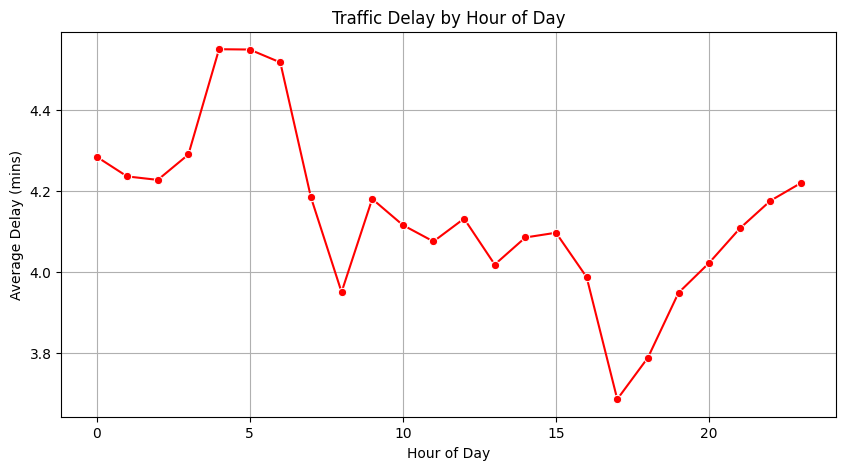

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data["hour"] = pd.to_datetime(data["StartTime"]).dt.hour
hourly_delay = data.groupby("hour")["DelayFromFreeFlowSpeed(mins)"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_delay.index, y=hourly_delay.values, marker="o", color="red")
plt.xlabel("Hour of Day")
plt.ylabel("Average Delay (mins)")
plt.title("Traffic Delay by Hour of Day")
plt.grid(True)
plt.show()


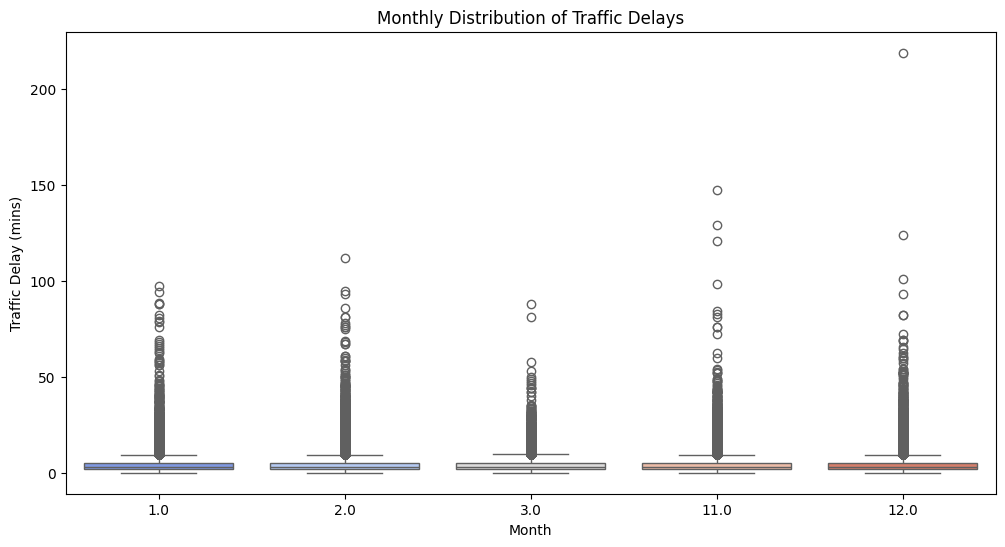

In [ ]:
data["month"] = pd.to_datetime(data["StartTime"]).dt.month
plt.figure(figsize=(12,6))
sns.boxplot(x=data["month"], y=data["DelayFromFreeFlowSpeed(mins)"], palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Traffic Delay (mins)")
plt.title("Monthly Distribution of Traffic Delays")
plt.show()

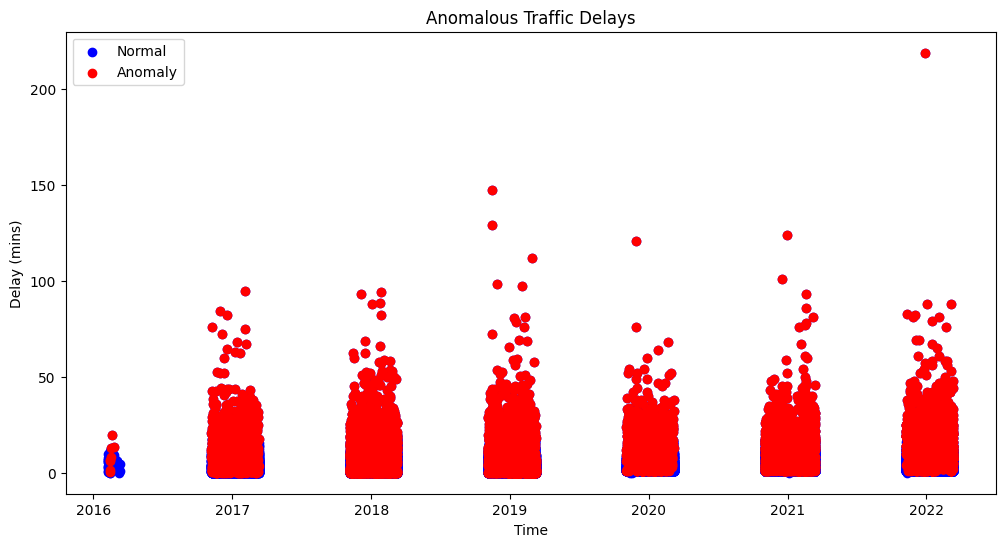

In [ ]:
from sklearn.ensemble import IsolationForest

data["timestamp"] = pd.to_datetime(data["StartTime"])
data["day_of_week"] = data["timestamp"].dt.dayofweek
data["hour"] = data["timestamp"].dt.hour

#Drop rows with NaT in timestamp column
data = data.dropna(subset=['timestamp'])

features = ["day_of_week", "hour", "DelayFromFreeFlowSpeed(mins)"]
model = IsolationForest(contamination=0.05)
data["anomaly"] = model.fit_predict(data[features])

# Plot anomalies
anomalies = data[data["anomaly"] == -1]
plt.figure(figsize=(12,6))
plt.scatter(data["timestamp"], data["DelayFromFreeFlowSpeed(mins)"], color="blue", label="Normal")
plt.scatter(anomalies["timestamp"], anomalies["DelayFromFreeFlowSpeed(mins)"], color="red", label="Anomaly")
plt.xlabel("Time")
plt.ylabel("Delay (mins)")
plt.legend()
plt.title("Anomalous Traffic Delays")
plt.show()